In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Reading data

In [4]:
import pandas as pd

# ignore chained assignment warnings
pd.options.mode.chained_assignment = None

data = pd.read_csv("/content/gdrive/My Drive/UTD/CS 6375 ML/salaries.csv")

In [5]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Data Analyst,150000,USD,150000,US,0,US,M
1,2022,MI,FT,Data Analyst,100000,USD,100000,US,0,US,M
2,2022,EN,FT,Data Engineer,160000,USD,160000,US,0,US,M
3,2022,EN,FT,Data Engineer,135000,USD,135000,US,0,US,M
4,2022,MI,FT,Data Engineer,120000,USD,120000,US,0,US,M


In [6]:
# checking dimensions
dim = data.shape
no_examples = dim[0]
attributes = dim[1]
print('Dataset has', no_examples, 'records with', attributes, 'fields each')

Dataset has 1493 records with 11 fields each


In [7]:
# data types for each field
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
# check for missing values - basic checking using existing pandas detection
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# To make sure we have no out of place or wrong values, checking the unique values in each column

# checking categorical columns first
cat_data = data.columns[data.dtypes == 'object']
for col in data[cat_data]:
  print('Attribute: ', col, '\t\tValues:', data[col].unique())

Attribute:  experience_level 		Values: ['MI' 'EN' 'SE' 'EX']
Attribute:  employment_type 		Values: ['FT' 'FL' 'PT' 'CT']
Attribute:  job_title 		Values: ['Data Analyst' 'Data Engineer' 'Data Science Manager' 'Data Scientist'
 'Applied Scientist' 'Data Management Specialist' 'Analytics Engineer'
 'Research Scientist' 'Machine Learning Engineer'
 'Autonomous Vehicle Technician' 'Data Science Tech Lead' 'BI Analyst'
 'Machine Learning Developer' 'Machine Learning Scientist'
 'Data Architect' 'Data Scientist Lead' 'Data Manager'
 'Cloud Data Engineer' 'Head of Data' 'Research Engineer'
 'Data Operations Analyst' 'ML Engineer' 'Data Operations Engineer'
 '3D Computer Vision Researcher' 'Marketing Data Analyst'
 'Data Science Lead' 'Power BI Developer' 'Product Data Scientist'
 'Data Science Consultant' 'BI Data Analyst' 'Big Data Engineer'
 'Principal Data Architect' 'Machine Learning Manager'
 'Lead Data Scientist' 'Lead Machine Learning Engineer' 'NLP Engineer'
 'Data Analytics Engineer' 

**Observations**

---


- No missing values in the categorical data
- Values in for **job_title** needed to be cleaned up - many variations for same posts

In [10]:
# checking numerical values again
num_data = data.columns[data.dtypes == 'int64']
data[num_data].isnull().sum()

work_year        0
salary           0
salary_in_usd    0
remote_ratio     0
dtype: int64

**Observations**

---


- No missing values in the numerical data too

### Data distributions

In [11]:
# cheking distributions - numerical data only
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1493.000000,1.493000e+03,1493.000000,1493.000000
mean,2021.749498,2.324291e+05,126247.468855,61.754856
std,0.537041,1.031311e+06,64129.535434,46.102827
min,2020.000000,5.000000e+03,5000.000000,0.000000
25%,2022.000000,8.400000e+04,80000.000000,0.000000
50%,2022.000000,1.300000e+05,127000.000000,100.000000
75%,2022.000000,1.794000e+05,169000.000000,100.000000
max,2022.000000,3.040000e+07,450000.000000,100.000000


In [12]:
# visualizations - using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

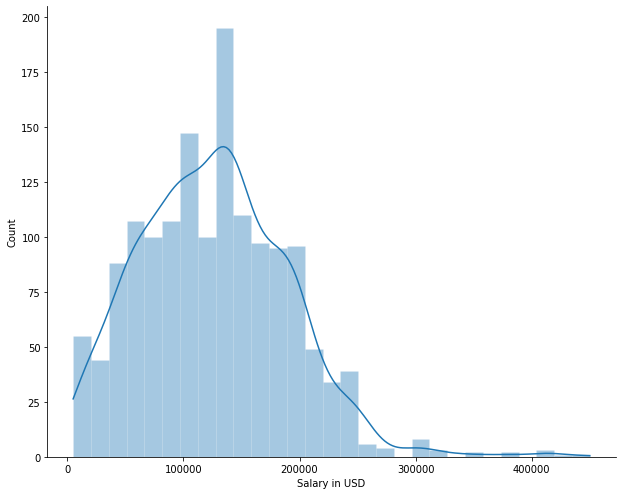

In [13]:
# general distribution of salary_in_USD
sal_plot = sns.displot(
    data['salary_in_usd'], kde=True,    
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=7, aspect=1.25
)
sal_plot.set_axis_labels("Salary in USD", "Count")
plt.show()

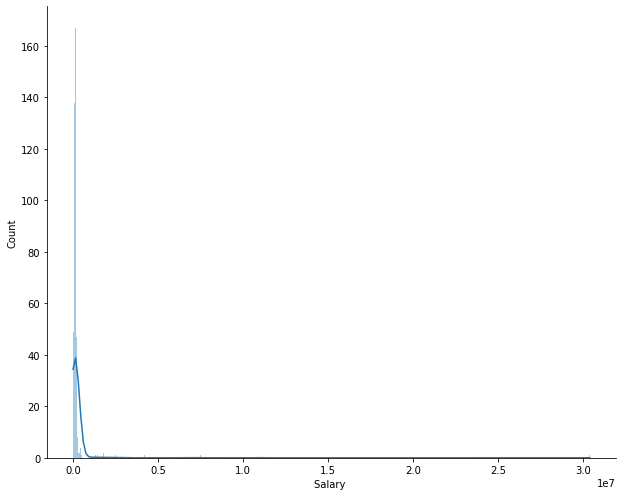

In [14]:
# general distribution of salary
sal_plot = sns.displot(
    data['salary'], kde=True,    
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=7, aspect=1.25
)
sal_plot.set_axis_labels("Salary ", "Count")
plt.show()

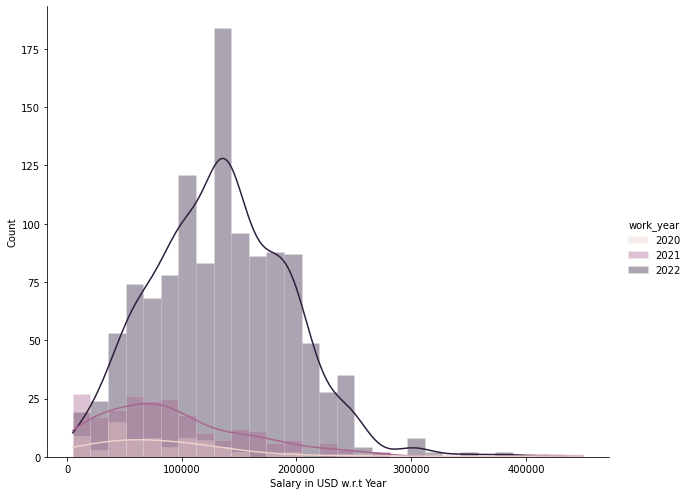

In [15]:
# distribution of salary_in_usd w.r.t year

sal_year_plot = sns.displot(
    data=data, x='salary_in_usd', hue='work_year', kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=7, aspect=1.25
)
sal_year_plot.set_axis_labels("Salary in USD w.r.t Year", "Count")

plt.show()

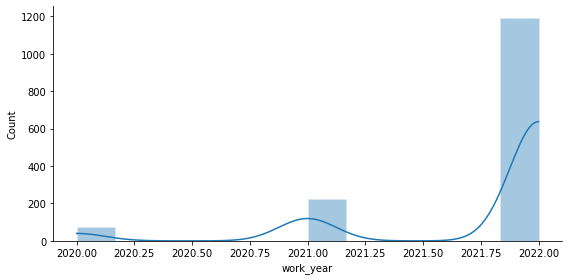

In [16]:
# distribution of the years for which we have data
sns.displot(
    data['work_year'], kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=2
)
plt.show()

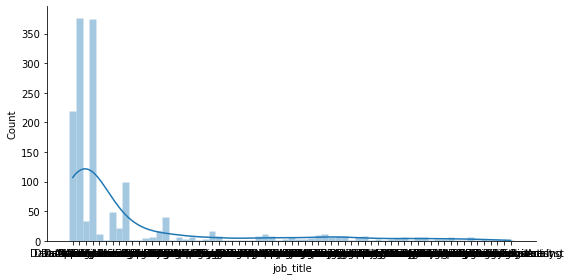

In [17]:
# distribution of the years for which we have data
sns.displot(
    data['job_title'], kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=2
)
plt.show()

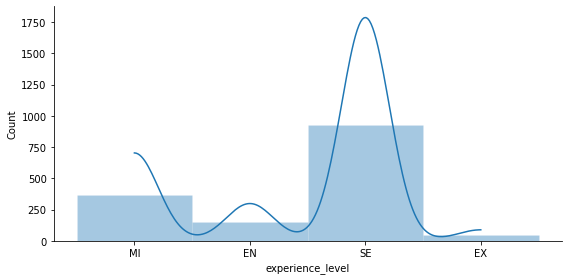

In [18]:
# distribution of the years for which we have data
sns.displot(
    data['experience_level'], kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=2
)
plt.show()

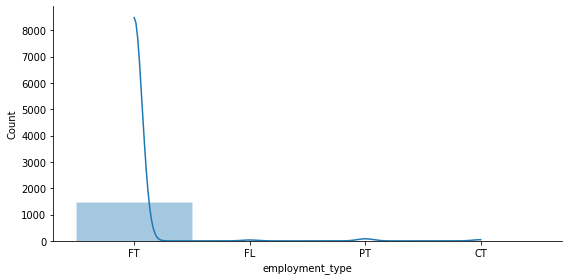

In [19]:
# distribution of the years for which we have data
sns.displot(
    data['employment_type'], kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=2
)
plt.show()

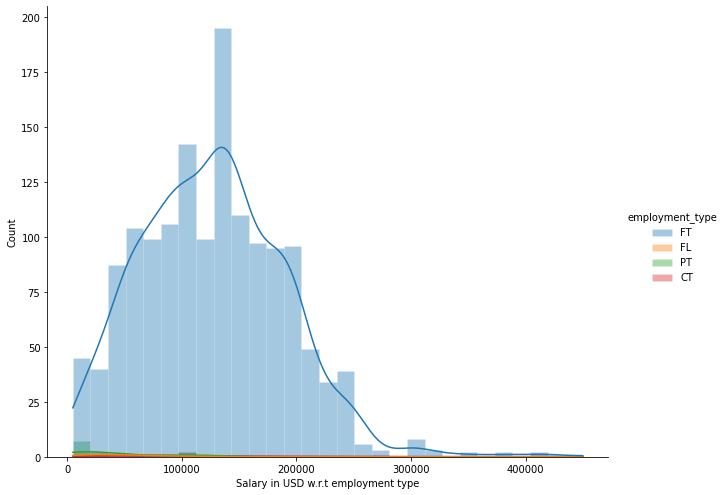

In [20]:
# distribution w.r.t employment_type
sal_emp_type_plot = sns.displot(
    data=data, x='salary_in_usd', hue='employment_type', kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=7, aspect=1.25
)
sal_emp_type_plot.set_axis_labels("Salary in USD w.r.t employment type", "Count")
plt.show()

**Observations**

---
- CT has the lowest salaries
- using this order: CT, FL, PT, FT to determine the order for encoding the classes in preprocessing

FT    1465
PT      14
CT       8
FL       6
Name: employment_type, dtype: int64


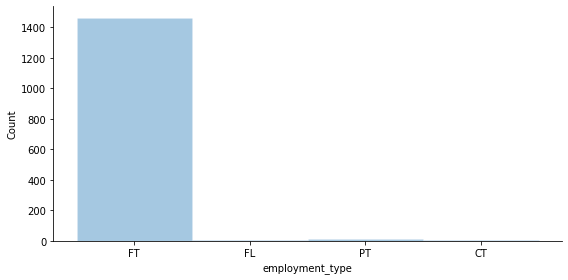

In [21]:
# distribution of the emplyment types for which we have data

print(data['employment_type'].value_counts())

sns.displot(
    data['employment_type'],
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=2
)
plt.show()

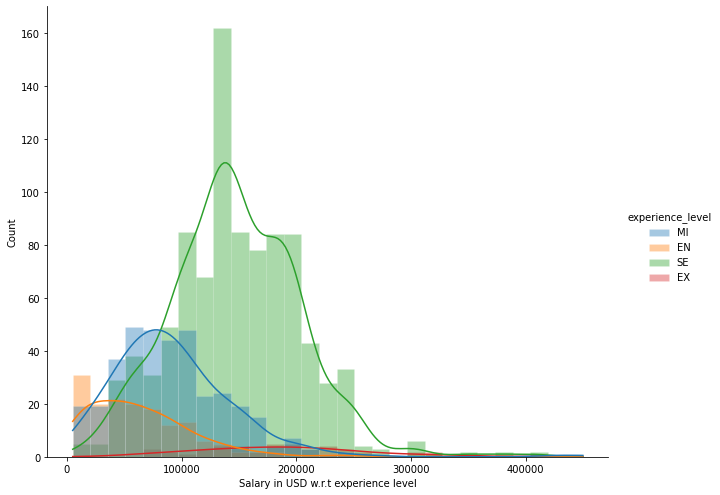

In [22]:
# distribution w.r.t experience_level
sal_emp_lvl_plot = sns.displot(
    data=data, x='salary_in_usd', hue='experience_level', kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=7, aspect=1.25
)
sal_emp_lvl_plot.set_axis_labels("Salary in USD w.r.t experience level", "Count")
plt.show()

SE    927
MI    365
EN    155
EX     46
Name: experience_level, dtype: int64


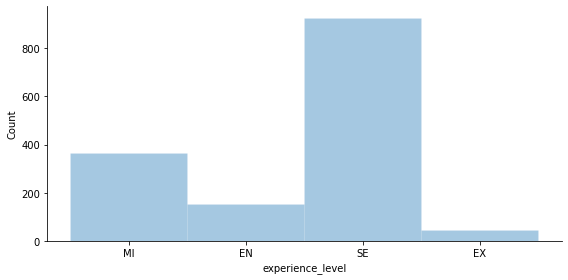

In [23]:
# distribution of the experience types for which we have data

print(data['experience_level'].value_counts())

sns.displot(
    data['experience_level'],
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=2
)
plt.show()

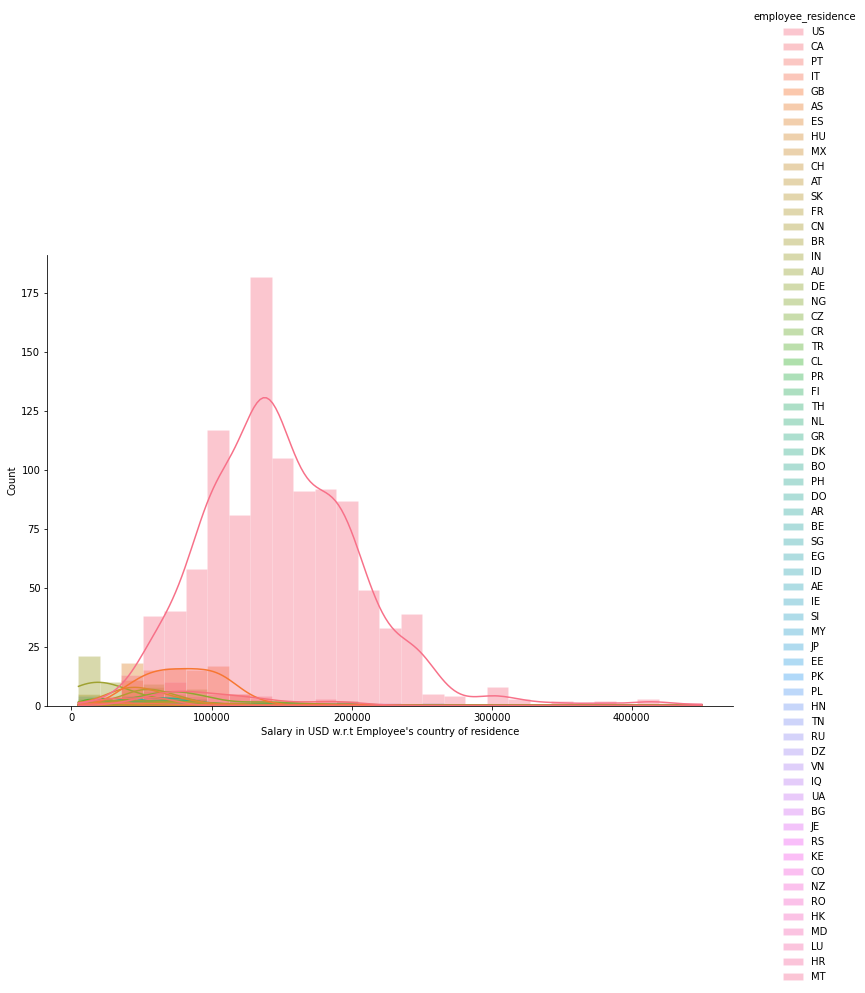

In [24]:
# distribution w.r.t employee_residence
sal_res_plot = sns.displot(
    data=data, x='salary_in_usd', hue='employee_residence', kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=7, aspect=1.5
)
sal_res_plot.set_axis_labels("Salary in USD w.r.t Employee's country of residence", "Count")
plt.show()

US    1058
GB      87
IN      44
CA      40
ES      31
      ... 
ID       1
EG       1
DO       1
CR       1
MT       1
Name: employee_residence, Length: 64, dtype: int64


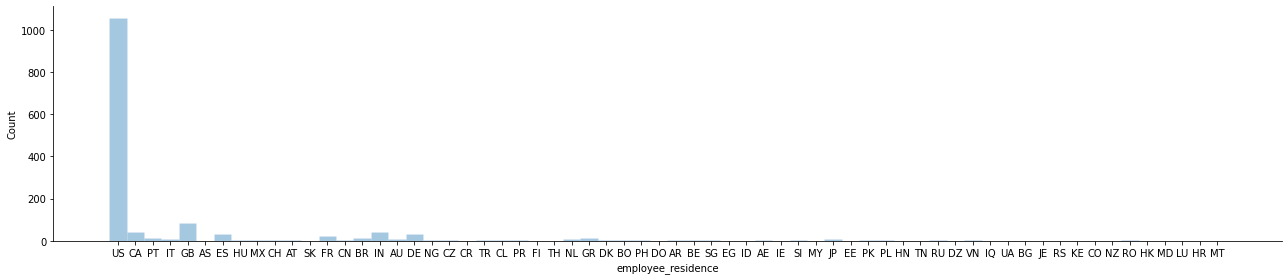

In [25]:
# distribution of the counties of residence for which we have data

print(data['employee_residence'].value_counts())

sns.displot(
    data['employee_residence'],
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=4.5
)
plt.show()

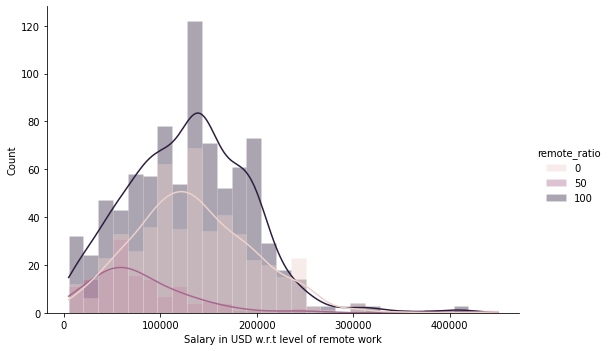

In [26]:
# distribution w.r.t remote_ratio
sal_rem_plot = sns.displot(
    data=data, x='salary_in_usd', hue='remote_ratio', kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=5, aspect=1.5
)
sal_rem_plot.set_axis_labels("Salary in USD w.r.t level of remote work", "Count")
plt.show()

100    851
0      500
50     142
Name: remote_ratio, dtype: int64


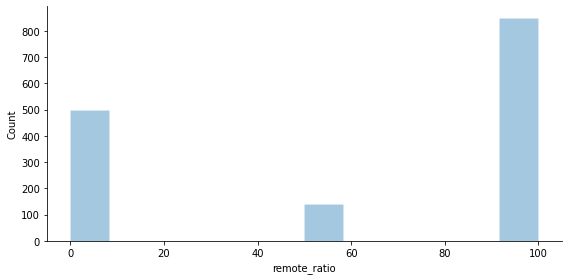

In [27]:
# distribution of the level of remote work for which we have data

print(data['remote_ratio'].value_counts())

sns.displot(
    data['remote_ratio'],
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=2
)
plt.show()

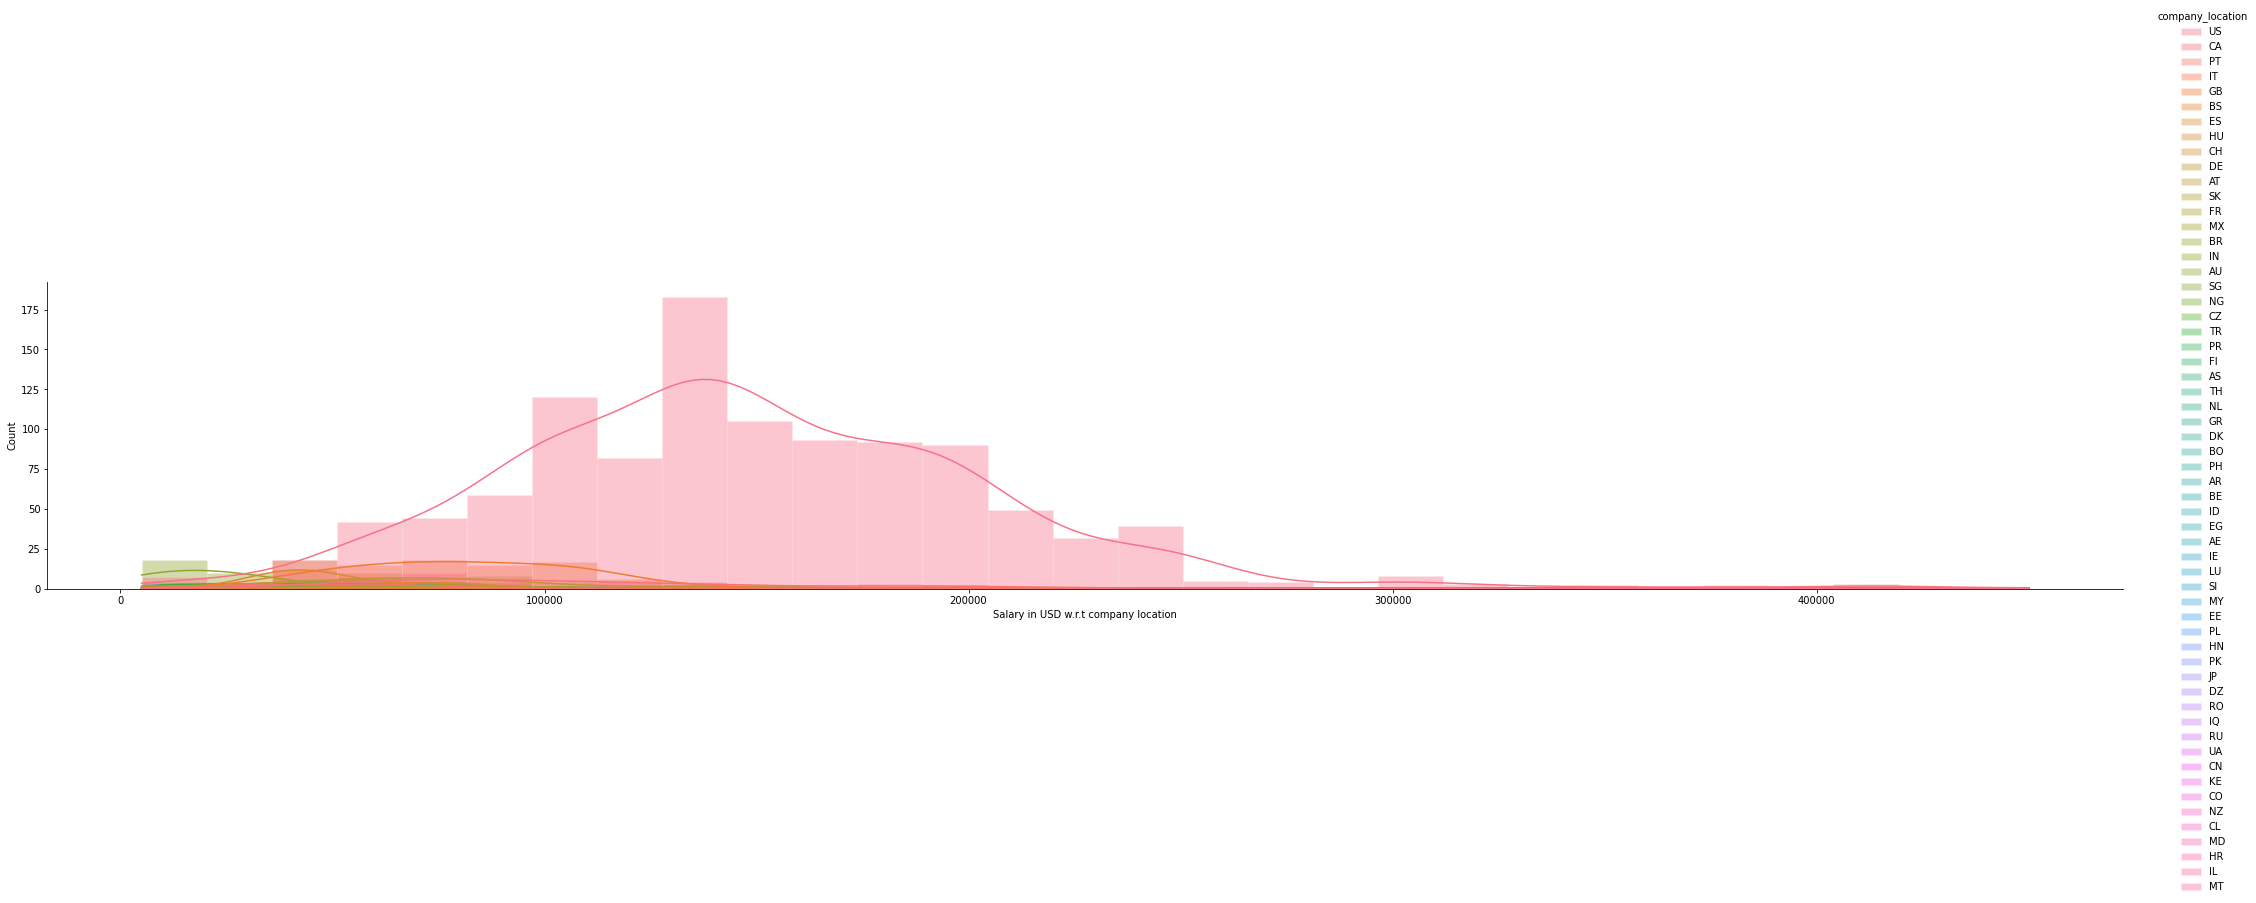

In [28]:
# distribution w.r.t company_location
sal_comp_loc_plot = sns.displot(
    data=data, x='salary_in_usd', hue='company_location', kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=5, aspect=6
)
sal_comp_loc_plot.set_axis_labels("Salary in USD w.r.t company location", "Count")
plt.show()

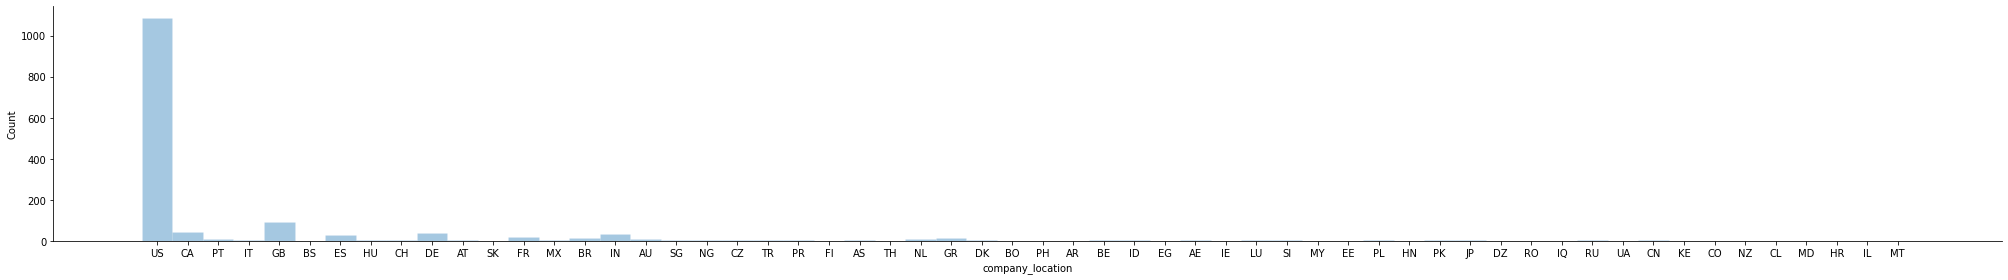

In [29]:
# distribution of the level of remote work for which we have data

sns.displot(
    data['company_location'],
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=4, aspect=7
)
plt.show()

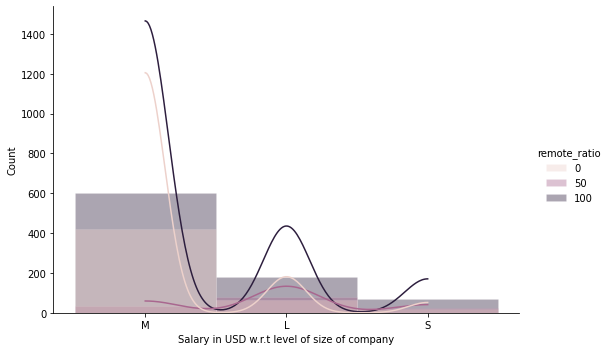

In [30]:
# distribution w.r.t company_size
sal_comp_size_plot = sns.displot(
    data=data, x='company_size', hue='remote_ratio', kde=True,
    alpha=.4, edgecolor=(1, 1, 1, .1),
    height=5, aspect=1.5
)
sal_comp_size_plot.set_axis_labels("Salary in USD w.r.t level of size of company", "Count")
plt.show()

M    1057
L     323
S     113
Name: company_size, dtype: int64


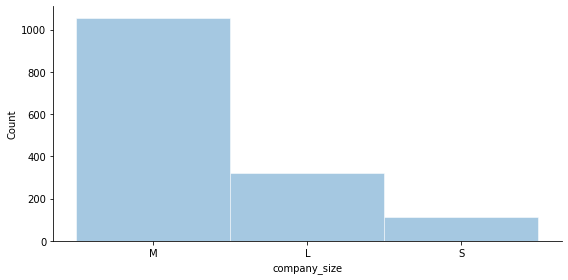

In [31]:
# distribution of the company size for which we have salary data

print(data['company_size'].value_counts())

sns.displot(
    data['company_size'],
    alpha=.4, edgecolor=(1, 1, 1, .5),
    height=4, aspect=2
)
plt.show()

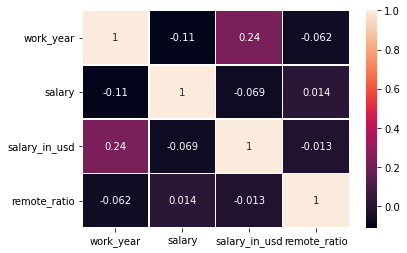

In [32]:
# correlation between numerical data
sns.heatmap(data.corr(), linewidths=0.5, annot=True)
plt.show()

In [33]:
# correlation of salary_in_usd with work_year and remote_ratio
data.corr()['salary_in_usd'].sort_values(ascending=False)

salary_in_usd    1.000000
work_year        0.236019
remote_ratio    -0.012802
salary          -0.068629
Name: salary_in_usd, dtype: float64

**Observations**

---
- salary_in_usd has correlation with the year of work 
- weak correlations with the amount of work done remotely


Preprocessing

Cleaning up the job_title field

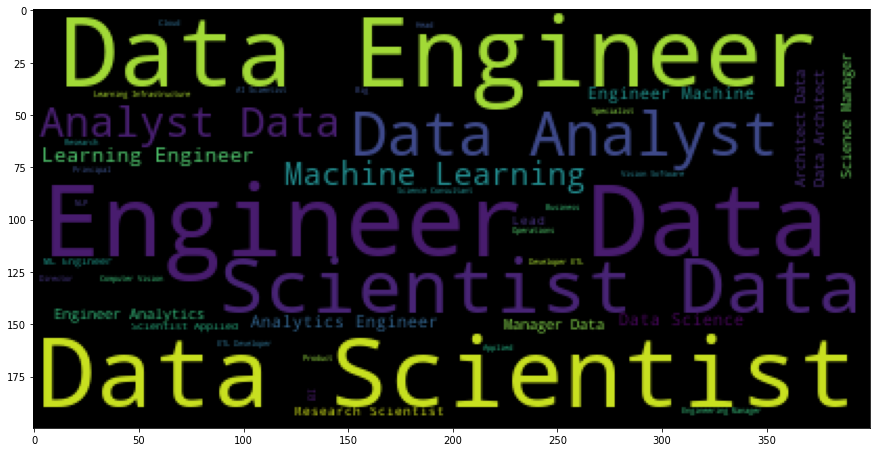

In [34]:
# generating word cloud to see all existing job titles and the highest frequency ones

from wordcloud import WordCloud

titles = " ".join(i for i in data.job_title)
wordCloud = WordCloud().generate(titles)

plt.figure( figsize=(15,10))
plt.imshow(wordCloud)
plt.show()

In [35]:
# using mappings to clean up the job titles

# main job titles - Data Analyst, Data Scientist, Data Engineer, Machine Learning Engineer, Researcher

mappings = {
    'Data Science Manager': 'Data Scientist', 
    'Applied Scientist': 'Data Scientist',
    'Data Management Specialist': 'Data Scientist',
    'Autonomous Vehicle Technician': 'Machine Learning Engineer',
    'BI Analyst': 'Data Analyst',
    'Analytics Engineer': 'Data Analyst',
    'Data Science Tech Lead': 'Data Scientist',
    'Machine Learning Developer': 'Machine Learning Engineer',
    'Machine Learning Scientist': 'Machine Learning Engineer',
    'Data Architect': 'Data Engineer',
    'Data Scientist Lead': 'Data Scientist',
    'Data Manager': 'Data Engineer',
    'Cloud Data Engineer': 'Data Engineer',
    'Head of Data': 'Data Engineer',
    'Research Engineer': 'Researcher',
    'Research Scientist': 'Researcher',
    'Data Operations Analyst': 'Data Analyst',
    'ML Engineer': 'Machine Learning Engineer',
    'Data Operations Engineer': 'Data Engineer',
    'Marketing Data Analyst': 'Data Analyst',
    'Data Science Lead': 'Data Scientist',
    '3D Computer Vision Researcher': 'Researcher',
    'Power BI Developer': 'Data Analyst',
    'Principal Data Architect': 'Data Engineer',
    'Machine Learning Manager': 'Machine Learning Engineer',
    'Lead Data Scientist': 'Data Scientist',
    'Lead Machine Learning Engineer': 'Machine Learning Engineer',
    'Data Analytics Engineer': 'Data Analyst',
    'ETL Developer': 'Data Scientist',
    'AI Scientist': 'Machine Learning Engineer',
    'Data Specialist': 'Data Scientist',
    'Business Data Analyst': 'Data Analyst',
    'Applied Machine Learning Scientist': 'Machine Learning Engineer',
    'Machine Learning Research Engineer': 'Machine Learning Engineer',
    'Data Engineering Manager': 'Data Engineer',
    'Director of Data Science': 'Data Scientist',
    'Financial Data Analyst': 'Data Analyst',
    'Computer Vision Software Engineer': 'Machine Learning Engineer',
    'Data Analytics Consultant': 'Data Analyst',
    'Product Data Analyst': 'Data Analyst',
    'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
    'Applied Data Scientist': 'Data Scientist',
    'Cloud Data Architect': 'Data Engineer',
    'Data Analytics Manager': 'Data Analyst',
    'Lead Data Engineer': 'Data Engineer',
    'Head of Machine Learning': 'Machine Learning Engineer',
    'Data Science Engineer': 'Data Engineer',
    'Head of Data Science': 'Data Scientist',
    'Computer Vision Engineer': 'Machine Learning Engineer',
    'Principal Data Analyst': 'Data Analyst',
    'Data Analytics Lead': 'Data Analyst',
    'Principal Data Scientist': 'Data Scientist',
    'Principal Data Engineer': 'Data Engineer',
    'Lead Data Analyst': 'Data Analyst',
    'Director of Data Engineering': 'Data Engineer',
    'Big Data Architect': 'Data Engineer',
    'Staff Data Scientist': 'Data Scientist',
    'Finance Data Analyst': 'Data Analyst',
    'Data Science Consultant': 'Data Scientist',
    'Big Data Engineer': 'Data Engineer',
    'NLP Engineer': 'Machine Learning Engineer',
    'Product Data Scientist': 'Data Scientist',
    'BI Data Analyst': 'Data Analyst'
}

In [36]:
data['job_title'] = data['job_title'].replace(mappings)
data['job_title'].value_counts()

Data Scientist               483
Data Engineer                474
Data Analyst                 326
Machine Learning Engineer    185
Researcher                    25
Name: job_title, dtype: int64

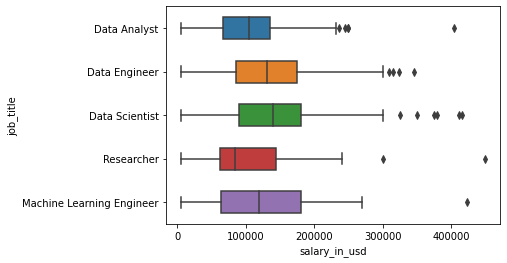

In [37]:
# checking distribution of salary based on the job title

sns.boxplot(
    data=data, x="salary_in_usd", y="job_title",
    dodge=False,
    width=0.5
)

plt.show()

### Cleaning up the country codes to continents
Done to reduce the overload of features in order consider each country

In [39]:
!pip install pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 51.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 316 kB 48.1 MB/s 
     |████████████████████████████████| 214 kB 80.3 MB/s 
     |████████████████████████████████| 298 kB 76.5 MB/s 
     |████████████████████████████████| 297 kB 84.0 MB/s 
     |████████████████████████████████| 297 kB 64.2 MB/s 
     |████████████████████████████████| 297 kB 82.5 MB/s 
     |████████████████████████████████| 296 kB 86.0 MB/s 
     |████████████████████████████████| 296 kB 79.2 MB/s 
     |████████████████████████████████| 280 kB 82.0 MB/s 
     |████████████████████████████████| 280 kB 65.0 MB/s 
     |████████████████████████████████| 280 kB 50.3 MB/s 
     |████████████████████████████████| 280 kB 78.0 MB/s 
     |██████████████

In [40]:
# using the pycountry_convert library that contains implmented methods to convert
# the ISO 3166 2 country codes to the continent codes
import pycountry_convert as pc

data['company_location'] = data['company_location'].map(lambda company_location: pc.country_alpha2_to_continent_code(company_location))
data['employee_residence'] = data['employee_residence'].map(lambda employee_residence: pc.country_alpha2_to_continent_code(employee_residence))
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Data Analyst,150000,USD,150000,NA,0,NA,M
1,2022,MI,FT,Data Analyst,100000,USD,100000,NA,0,NA,M
2,2022,EN,FT,Data Engineer,160000,USD,160000,NA,0,NA,M
3,2022,EN,FT,Data Engineer,135000,USD,135000,NA,0,NA,M
4,2022,MI,FT,Data Engineer,120000,USD,120000,NA,0,NA,M


In [41]:
# values before label encoding
includeCols = ['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'company_location', 'employee_residence']
for col in includeCols:
  print(col)
  print(data[col].value_counts())

work_year
2022    1194
2021     224
2020      75
Name: work_year, dtype: int64
experience_level
SE    927
MI    365
EN    155
EX     46
Name: experience_level, dtype: int64
employment_type
FT    1465
PT      14
CT       8
FL       6
Name: employment_type, dtype: int64
job_title
Data Scientist               483
Data Engineer                474
Data Analyst                 326
Machine Learning Engineer    185
Researcher                    25
Name: job_title, dtype: int64
remote_ratio
100    851
0      500
50     142
Name: remote_ratio, dtype: int64
company_size
M    1057
L     323
S     113
Name: company_size, dtype: int64
company_location
NA    1138
EU     256
AS      64
SA      17
OC      12
AF       6
Name: company_location, dtype: int64
employee_residence
NA    1109
EU     262
AS      79
SA      25
OC      11
AF       7
Name: employee_residence, dtype: int64


In [43]:
# defining custom function to be able to specify the order of classes for the label encoder
from sklearn.utils import column_or_1d
from sklearn.preprocessing import LabelEncoder

class OrderedLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

In [44]:
# standard label encoding - using the ascending order of sorted classes by default
encodedCols = ['work_year', 'remote_ratio']
stdEncoded = data[encodedCols].apply(LabelEncoder().fit_transform)

# performing label encoding using a custom order of the classes
orderForEncoding = {
    'experience_level': ['EN', 'MI', 'SE', 'EX'],
    'employment_type': ['CT', 'FL', 'PT', 'FT'],
    'company_size': ['S', 'M', 'L']
}
# create a copy of the data to be order encoded
orderedEncoded = data[[col for col in orderForEncoding]]
# update the copy with the ordered and encoded values
for col in orderForEncoding:
  orderedEncoder = OrderedLabelEncoder()
  orderedEncoder.fit(orderForEncoding[col])
  orderedEncoded[col] = orderedEncoder.transform(data[col])

# one hot encoding - only for string related data columns
companyLocationsEncoded = pd.get_dummies(data.company_location, prefix='CL')
employeeResidencesEncoded = pd.get_dummies(data.employee_residence, prefix='ER')
jobTitlesEncoded = pd.get_dummies(data.job_title, prefix='JT')

In [45]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Data Analyst,150000,USD,150000,NA,0,NA,M
1,2022,MI,FT,Data Analyst,100000,USD,100000,NA,0,NA,M
2,2022,EN,FT,Data Engineer,160000,USD,160000,NA,0,NA,M
3,2022,EN,FT,Data Engineer,135000,USD,135000,NA,0,NA,M
4,2022,MI,FT,Data Engineer,120000,USD,120000,NA,0,NA,M


In [46]:
# concat the encoded dfs - std label encoded, ordered label encoded
# one hot encoded dfs - compnay locations and employee residences 
# and the df containing salary data (in usd) from original df
# also drops unnecessary columns in the process
dfs = [stdEncoded, orderedEncoded, companyLocationsEncoded, employeeResidencesEncoded, jobTitlesEncoded, data['salary_in_usd']]
completeEncoded = pd.concat(dfs, axis=1)
completeEncoded.head()

,work_year,remote_ratio,experience_level,employment_type,company_size,CL_AF,CL_AS,CL_EU,CL_NA,CL_OC,...,ER_EU,ER_NA,ER_OC,ER_SA,JT_Data Analyst,JT_Data Engineer,JT_Data Scientist,JT_Machine Learning Engineer,JT_Researcher,salary_in_usd
0,2,0,1,3,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,150000
1,2,0,1,3,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,100000
2,2,0,0,3,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,160000
3,2,0,0,3,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,135000
4,2,0,1,3,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,120000


In [47]:
# checking values after label encoding
includeCols = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
for col in includeCols:
  print(completeEncoded[col].value_counts())

2    1194
1     224
0      75
Name: work_year, dtype: int64
2    927
1    365
0    155
3     46
Name: experience_level, dtype: int64
3    1465
2      14
0       8
1       6
Name: employment_type, dtype: int64
2    851
0    500
1    142
Name: remote_ratio, dtype: int64
1    1057
2     323
0     113
Name: company_size, dtype: int64


In [48]:
completeEncoded.head()

,work_year,remote_ratio,experience_level,employment_type,company_size,CL_AF,CL_AS,CL_EU,CL_NA,CL_OC,...,ER_EU,ER_NA,ER_OC,ER_SA,JT_Data Analyst,JT_Data Engineer,JT_Data Scientist,JT_Machine Learning Engineer,JT_Researcher,salary_in_usd
0,2,0,1,3,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,150000
1,2,0,1,3,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,100000
2,2,0,0,3,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,160000
3,2,0,0,3,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,135000
4,2,0,1,3,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,120000


Normalizing

In [50]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# columns to be normalized
includeCols = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
# normalizer
completeEncoded[includeCols] = scaler.fit_transform(completeEncoded[includeCols])
completeEncoded.head()

,work_year,remote_ratio,experience_level,employment_type,company_size,CL_AF,CL_AS,CL_EU,CL_NA,CL_OC,...,ER_EU,ER_NA,ER_OC,ER_SA,JT_Data Analyst,JT_Data Engineer,JT_Data Scientist,JT_Machine Learning Engineer,JT_Researcher,salary_in_usd
0,1.0,0.0,0.333333,1.0,0.5,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,150000
1,1.0,0.0,0.333333,1.0,0.5,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,100000
2,1.0,0.0,0.000000,1.0,0.5,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,160000
3,1.0,0.0,0.000000,1.0,0.5,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,135000
4,1.0,0.0,0.333333,1.0,0.5,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,120000


Training

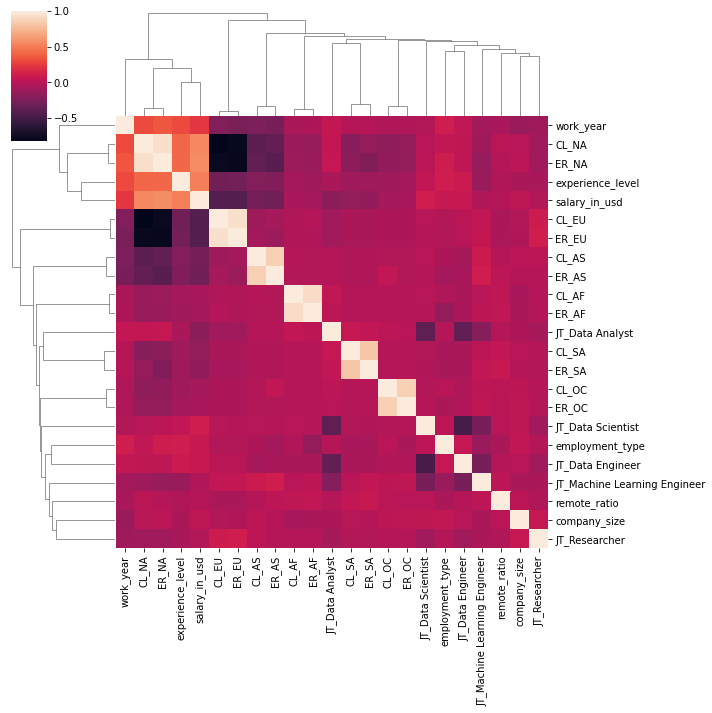

In [51]:
# renaming data after preprocessing to avoid confusion
inputData = completeEncoded

sns.clustermap(inputData.corr())
plt.show()

**Observations**

---
After preprocessing it seems that
- work_year
- CL_NA -> company location in North America
- ER_NA -> Employee residence in North America
- experience_level

have the highest correlations with salary_in_usd

In [52]:
from sklearn.model_selection import train_test_split

# using 80% for training and 20% for testing
train_set, test_set = train_test_split(inputData, test_size = 0.2, random_state = 5)

# splitting into X, Y
X_train = train_set.drop('salary_in_usd', axis=1)
y_train = train_set['salary_in_usd']
X_test = test_set.drop('salary_in_usd', axis=1)
y_test = test_set['salary_in_usd']
# checking x, y
print('Training X:', X_train.shape, 'Y:', y_train.shape)
print('Testing X:', X_test.shape, 'Y:', y_test.shape)

Training X: (1194, 22) Y: (1194,)
Testing X: (299, 22) Y: (299,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, r2_score


# Initialize the model
lin_reg = LinearRegression()
# Fit the model on the training set
lin_reg.fit(X_train,y_train)

# Evaluate the model on the test set: 
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print('RMSE of Linear Regression is: ', rmse_lin)
print("MAE", mean_absolute_error(y_test,y_pred_lin))

RMSE of Linear Regression is:  2.4510001270669376e+16
MAE 1417449971768417.8


In [ ]:
# checking Mean Squared Error
mse = mean_squared_error(y_test, lin_reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

# checking accuracy
print("Accuracy:", lin_reg.score(X_test, y_test)*100)

The mean squared error (MSE) on test set: 2311012024.8754
Accuracy: 44.56081166797657


SVM

In [ ]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [65]:
# importing SVM module
from sklearn.svm import SVC
# importing accuracy score
from sklearn.metrics import r2_score

# kernel to be set linear as it is binary class
classifier = SVC(kernel='linear')

# traininf the model
classifier.fit(X_train, y_train)

# testing the model
y_pred = classifier.predict(X_test)

# printing the accuracy of the model
print(r2_score(y_test, y_pred))

0.29635998613116843


In [66]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X_train, y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# printing the accuracy of the model
print(r2_score(y_test, y_pred))

0.3374545110890802


In [70]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set: polynomial 
classifier1 = SVC(kernel='poly')

# traininf the model
classifier1.fit(X_train, y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# printing the accuracy of the model
print(r2_score(y_test, y_pred))

0.29881228699776063


In [68]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set: sigmoid 
classifier1 = SVC(kernel='sigmoid')

# traininf the model
classifier1.fit(X_train, y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# printing the accuracy of the model
print(r2_score(y_test, y_pred))

-0.14925521049766743
